In [30]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [31]:
# load manually compiled
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_0.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_1.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_2.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/original_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data_normed = data.divide(data.sum(axis=1), axis=0)
manual = pd.DataFrame({"Emitter 1": data_normed["|1000>"], "Emitter 2": (data_normed["|0100>"] + data_normed["|0010>"]) / 2})

In [32]:
# load superstaq compiled
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_0.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_1.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_2.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data_normed = data.divide(data.sum(axis=1), axis=0)
superstaq = pd.DataFrame({"Emitter 1": data_normed["|1000>"], "Emitter 2": (data_normed["|0100>"] + data_normed["|0010>"]) / 2})

In [33]:
# load mirror swaps
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_0.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_1.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_2.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/superstaq_mswap_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data_normed = data.divide(data.sum(axis=1), axis=0)
mirror_swap = pd.DataFrame({"Emitter 1": data_normed["|1000>"], "Emitter 2": (data_normed["|0100>"] + data_normed["|0010>"]) / 2})

In [34]:
# load RC
runs = [
    np.load(file, allow_pickle=True) for file in (
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_0.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_1.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_2.npy',
        '../data/QSCOUT/UCDavis_11_11_24_AllCodes/rc_all_probs_3.npy',
    )
]

# indices into each timestep results
states = {
    "|1000>": 1,
    "|0100>": 2,
    "|0010>": 4,
    "|0001>": 8,
}

data = sum([pd.DataFrame({k: [row[v] for row in run] for k, v in states.items()}) for run in runs]) / len(runs)
data_normed = data.divide(data.sum(axis=1), axis=0)
rc = pd.DataFrame({"Emitter 1": data_normed["|1000>"], "Emitter 2": (data_normed["|0100>"] + data_normed["|0010>"]) / 2})

In [35]:
N = 3
g = 4
kappa = 2
times = np.linspace(0, 3, 51)

In [36]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

/var/folders/ds/t6zgkw3n75d3gzz89xmkcncm0000gn/T/ipykernel_98326/2990240322.py:84: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


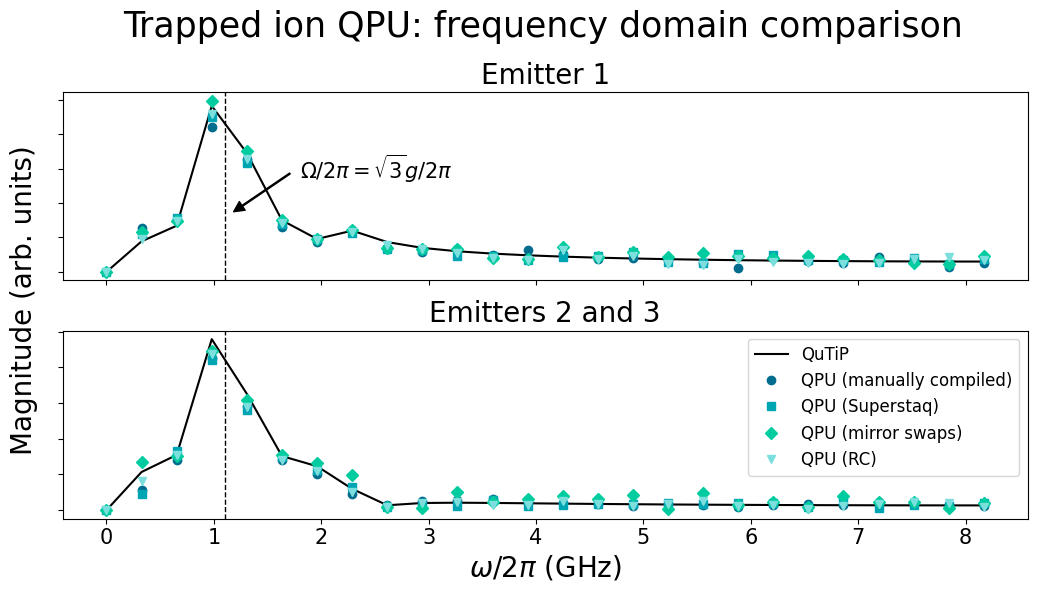

In [37]:
# Paper fourier for AQT
rabi_freq = np.sqrt(3) * g / (2*np.pi)

n = len(manual)

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

freqs = np.fft.rfftfreq(n, times[1] - times[0])

##
em1_fft_qt = np.abs(np.fft.rfft(qutip_results["Emitter 1"] - qutip_results["Emitter 1"].mean(), n))
axes[0].plot(freqs, em1_fft_qt, label="QuTiP", color='black')

em1_fft = np.abs(np.fft.rfft(manual["Emitter 1"] - manual["Emitter 1"].mean(), n))
axes[0].plot(freqs, em1_fft, label="QPU (manually compiled)", marker='o', color='#006d8f', linestyle='None')

axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_title("Emitter 1", fontsize=20)
axes[0].axvline(rabi_freq, lw=1, color='black', linestyle='--')

##

em23_fft = np.abs(np.fft.rfft(qutip_results["Emitter 2"] - qutip_results["Emitter 2"].mean(), n))
axes[1].plot(freqs, em23_fft, label="QuTiP", color='black')

em23_fft = np.abs(np.fft.rfft(manual["Emitter 2"] - manual["Emitter 2"].mean(), n))
axes[1].plot(freqs, em23_fft, label="QPU (manually compiled)", marker='o', color='#006d8f', linestyle='None')

axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_yticklabels([])
axes[1].set_title("Emitters 2 and 3", fontsize=20)
axes[1].axvline(rabi_freq, lw=1, color='black', linestyle='--')


### superstaq compiled
em1_fft_superstaq = np.abs(np.fft.rfft(superstaq["Emitter 1"] - superstaq["Emitter 1"].mean(), n))
axes[0].plot(freqs, em1_fft_superstaq, label="QPU (Superstaq)", marker='s', color='#00a5b3', linestyle='None')

em23_fft_superstaq = np.abs(np.fft.rfft(superstaq["Emitter 2"] - superstaq["Emitter 2"].mean(), n))
axes[1].plot(freqs, em23_fft_superstaq, label="QPU (Superstaq)", marker='s', color='#00a5b3', linestyle='None')


### mirror swaps
em1_fft_nox = np.abs(np.fft.rfft(mirror_swap["Emitter 1"] - mirror_swap["Emitter 1"].mean(), n))
axes[0].plot(freqs, em1_fft_nox, label="QPU (mirror swaps)", marker='D', color='#00cc9f', linestyle='None')

em23_fft_nox = np.abs(np.fft.rfft(mirror_swap["Emitter 2"] - mirror_swap["Emitter 2"].mean(), n))
axes[1].plot(freqs, em23_fft_nox, label="QPU (mirror swaps)", marker='D', color='#00cc9f', linestyle='None')


### RC
em1_fft_nox = np.abs(np.fft.rfft(rc["Emitter 1"] - rc["Emitter 1"].mean(), n))
axes[0].plot(freqs, em1_fft_nox, label="QPU (RC)", marker='v', color='#7cdfdd', linestyle='None')

em23_fft_nox = np.abs(np.fft.rfft(rc["Emitter 2"] - rc["Emitter 2"].mean(), n))
axes[1].plot(freqs, em23_fft_nox, label="QPU (RC)", marker='v', color='#7cdfdd', linestyle='None')


axes[1].set_xlabel(r"$\omega / 2\pi$ (GHz)", fontsize=20)


##
fig.text(-0.04, 0.72, "Magnitude (arb. units)", transform=axes[0].transAxes,
        ha='center', va='top', fontsize=20, rotation=90)
##
axes[0].annotate(
    r'$\Omega/2\pi = \sqrt{3}g/2\pi$', # the text of the annotation
    fontsize=15,
    xy=(rabi_freq + 0.06, 1.7),       # the point (x,y) to annotate
    xytext=(1.8, 2.7),   # the position of the text (x,y)
    arrowprops=dict(
        arrowstyle="simple, tail_width=0.05, head_width=.5, head_length=.5",
        connectionstyle="arc3",  # connection style
        facecolor='black',
        relpos=(-0.05, 0.4),
    )
)
##

fig.suptitle("Trapped ion QPU: frequency domain comparison", fontsize=25)
plt.legend(fontsize=12)
plt.tight_layout()
fig.show()

In [38]:
fig.savefig("../figures/QSCOUT_fourier.eps")